# 4.1. Вступление к модулю

Задача оптимизации — найти максимум или минимум функции:
При этом функция f на вход может принимать одну переменную, вектор из нескольких переменных, или другой объект, но возвращать всегда число. Функция может быть абсолютно любой:

элементарная функция;
функция потерь модели предсказаний, например, количество топлива, которое потратит грузовик, если будет ехать по маршруту х, или заработная плата в зависимости от времени, потраченного на обучение.
Как правило, нужно найти значение функции и х, который приводит к оптимальному значению.

Иногда накладывается какое-нибудь дополнительное условие на х.

# 4.2. Метод Лагранжа

В случае безусловной оптимизации в модуле 3 мы решали задачи, приравнивая к нулю производную функции одной переменной или все частные производные в многомерном случае; далее находили экстремумы и выбирали минимум.

Что делать, если есть условие? Рассмотрим задачу оптимизации с ограничениями.

Для того, чтобы найти минимум функции f(x) при условии, что имеется ограничение φi(х) = 0

Составляется функция Лагранжа:


# 4.3. Метод Лагранжа. Ограничения ─ неравенства

# 4.4. Линейное программирование

# 4.5. Практика. Линейное программирование

In [6]:
import numpy as np
from scipy.optimize import linprog

# Допустим, у нас есть n товаров с заданными стоимостями vi и массой wi. В сумку убирается с кг. 
# Сколько какого товара взять, чтобы сумма всех стоимостей товаров была наибольшей?
values = [4, 2, 1, 7, 3, 6]
weights = [5, 9, 8, 2, 6, 5]
C = 15
n = 6

c = - np.array(values)
A = np.array(weights)         #shape = (6,)
A = np.expand_dims(A, 0)      #shape = (1,6)
b = np.array([C])

print(c, A, b)

linprog(c=c, A_ub=A, b_ub=b)

[-4 -2 -1 -7 -3 -6] [[5 9 8 2 6 5]] [15]


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -52.5
              x: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00  0.000e+00
                   0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 1.350e+01  2.950e+01  2.700e+01  0.000e+00
                              1.800e+01  1.150e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-3.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [37]:
import cvxpy

x = cvxpy.Variable(shape=n, integer = True)

constraint = (A @ x <= b)
x_positive = (x >= 0)
total_value = (c * x)

problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])

problem.solve()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 21 times so far.

  warnings.warn(msg, UserWarning)


-49.0

In [38]:
x.value

array([-0., -0., -0.,  7., -0.,  0.])

In [39]:
import cvxpy

x = cvxpy.Variable(shape=n, boolean = True)

constraint = (A @ x <= b)
x_positive = (x >= 0)
total_value = (c * x)

problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])

problem.solve()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 22 times so far.

  warnings.warn(msg, UserWarning)


-17.0

In [40]:
x.value

array([1., 0., 0., 1., 0., 1.])

In [6]:
# Задание 4.5.1

from scipy.optimize import linprog	

c = [2, 5, 3, 7, 7, 6]
A_ub = [[1,1,1,0,0,0],
               [0,0,0,1,1,1]] 
b_ub = [180,220] 
A_eq = [[1,0,0,1,0,0],
               [0,1,0,0,1,0],
               [0,0,1,0,0,1]] 
b_eq = [110, 150, 140] 
print(linprog(c, A_ub, b_ub, A_eq, b_eq))

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 1900.0
              x: [ 1.100e+02  0.000e+00  7.000e+01  0.000e+00  1.500e+02
                   7.000e+01]
            nit: 1
          lower:  residual: [ 1.100e+02  0.000e+00  7.000e+01  0.000e+00
                              1.500e+02  7.000e+01]
                 marginals: [ 0.000e+00  1.000e+00  0.000e+00  2.000e+00
                              0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 5.000e+00  7.000e+00  6.000e+00]
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.000e+00 -0.000e+00]
 m

In [8]:
# Задание 4.5.2

import cvxpy
import numpy as np

x = cvxpy.Variable(shape = (5, 5), boolean = True)

values = np.array([[1000, 12, 10, 19, 8], 
                  [12, 1000, 3, 7, 2],
                  [10, 3, 1000, 6, 20],
                  [19, 7, 6, 1000, 4],
                  [8, 2, 20, 4, 1000]])

b = np.array([1, 1, 1, 1, 1])

constraint_1 = (x >= 0)
constraint_2 = np.array([1, 1, 1, 1, 1])*x == b
constraint_3 = np.array([1, 1, 1, 1, 1])*x.T == b

total_value = values[0] * x[0] + values[1] * x[1] + values[2] * x[2] + values[3] * x[3] + values[4] * x[4]

problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints = [constraint_1, constraint_2, constraint_3])

min_value = problem.solve()

print(min_value) 
print(x.value)
print()
print(sum(sum(values*x.value)))


32.0
[[ 0.  0. -0.  0.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 1. -0.  0.  0.  0.]
 [ 0.  1.  0.  0. -0.]
 [-0.  0.  0.  1.  0.]]

32.0


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-m

In [12]:
#4.5.1:

import cvxpy
import numpy as np

x = cvxpy.Variable(shape = 6, integer = True)

values = np.array([2, 5, 3, 7, 7, 6])

constraint_1 = (x[0] + x[1] + x[2] <= 180)
constraint_2 = (x[3] + x[4] + x[5] <= 220)
constraint_3 = (x[0] + x[3] == 110)
constraint_4 = (x[1] + x[4] == 150)
constraint_5 = (x[2] + x[5] == 140)

constraint_6 = (x >= 0)

total_value = values * x

problem = cvxpy.Problem(cvxpy.Minimize(total_value), 
                        constraints = [constraint_1, constraint_2, constraint_3, constraint_4, constraint_5, constraint_6])

min_value = problem.solve()

print(min_value, x.value)


1900.0 [110.   0.  70.  -0. 150.  70.]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cvxpy\expressions\expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


# 4.6. Градиентный спуск
Для того, чтобы решать задачу оптимизации методом множителей Лагранжа, нужно решать общую систему уравнений, а для этого метода может не существовать. Другой подход к нахождению минимума функции — метод градиентного спуска.

x(n+1) = x(n) - γ * gradient(f(x(n)))

Здесь x(n) — точка проверки на n-ном шаге;
рис— значение градиента в этой точке;
γ (gamma)— темп обучения (learning rate).

Темп обучения — основной параметр алгоритма, он определяет то, на сколько сильно мы будем двигать нашу точку. Минус перед градиентом указывает направление роста функции, а нам интересен минимум, то есть противоположное направление.



In [8]:
import numpy as np

x = 0
y = 0
z = 0

gamma = 0.25

f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z

X = 4*x    - 4*z +   4*y**2 - 8*y*z + 9*z**2 + 4 +   8*y - 20*z
Y = 2*x**2 - 4*x*z + 8*y -    8*z +   9*z**2 + 4*x + 8 -   20*z
Z = 2*x**2 - 4*x +   4*y**2 - 8*y +   18*z +   4*x + 8*y - 20

gradientX = 0 - (gamma * X)
gradientY = 0 - (gamma * Y)
gradientZ = 0 - (gamma * Z)

print(gradientX, gradientY , gradientZ)
print(X, Y , Z)

-1.0 -2.0 5.0
4 8 -20


# 4.7. --> Практика. Градиентный спуск

Оптимизировать будем функцию Розенброка:

In [4]:

def f (x ,y):
    return (1 - x)**2 + 100 * (y - x**2)**2
def grad (x, y):
    dx = 2*x - 2 + 100 * (-4*y*x + 4*x**3)
    dy = 100 * (2*y - 2*x**2)
    return (dx, dy)


x0 = (0, 0) #начальная координата
gamma = 1e-6
x_cur = x0 

vals = [] #значение функции на каждом шаге
coords = [] #координаты X на каждом шаге
i = 0

while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0], x_cur[1] - gamma * grad(*x_cur)[1])

    if (i >= 50000000):
        break

    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1

    #print ( f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f}); f(x)={f(*x_cur):.2f}; graf f(x) ({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")


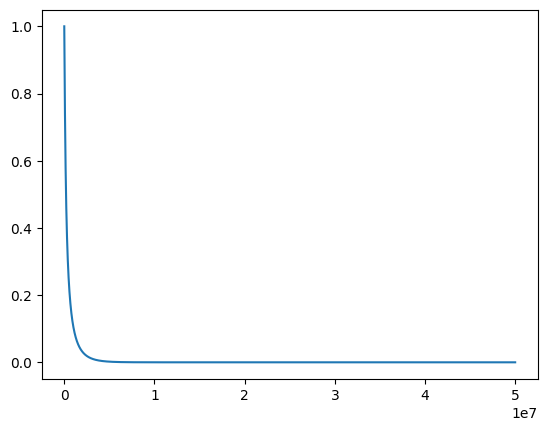

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(vals)

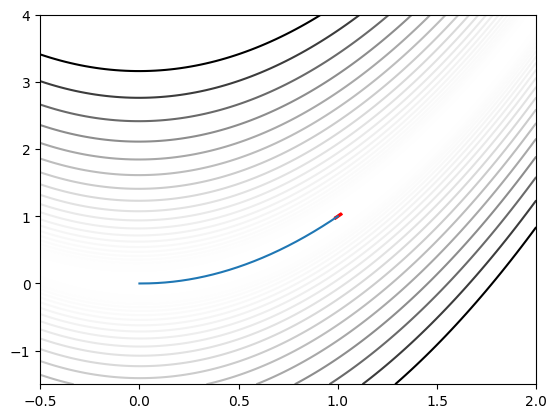

In [6]:
n = 100
m = 100
a = -0.5
b = 2
c = -1.5
d = 4

X,Y = np.meshgrid(np.linspace(a, b, n), np.linspace(c, d, m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X, Y, Z, np.logspace(-0.5, 3, 31), cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')


In [7]:

def f (x ,y):
    return (1 - x)**2 + 100 * (y - x**2)**2
def grad (x, y):
    dx = 2*x - 2 + 100 * (-4*y*x + 4*x**3)
    dy = 100 * (2*y - 2*x**2)
    return (dx, dy)


x0 = (0, 0) #начальная координата
gamma = 1e-3
x_cur = x0 

vals = [] #значение функции на каждом шаге
coords = [] #координаты X на каждом шаге
i = 0

while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0], x_cur[1] - gamma * grad(*x_cur)[1])

    if f(*x_cur) <= 0.01:
        break

    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1

    print ( f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f}); f(x)={f(*x_cur):.2f}; graf f(x) ({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")


iter=1; x=(0.00, 0.00); f(x)=1.00; graf f(x) (-2.00, -0.00)
iter=2; x=(0.00, 0.00); f(x)=0.99; graf f(x) (-1.99, -0.00)
iter=3; x=(0.01, 0.00); f(x)=0.99; graf f(x) (-1.99, -0.01)
iter=4; x=(0.01, 0.00); f(x)=0.98; graf f(x) (-1.98, -0.01)
iter=5; x=(0.01, 0.00); f(x)=0.98; graf f(x) (-1.98, -0.02)
iter=6; x=(0.01, 0.00); f(x)=0.98; graf f(x) (-1.98, -0.02)
iter=7; x=(0.01, 0.00); f(x)=0.97; graf f(x) (-1.97, -0.03)
iter=8; x=(0.02, 0.00); f(x)=0.97; graf f(x) (-1.97, -0.03)
iter=9; x=(0.02, 0.00); f(x)=0.96; graf f(x) (-1.96, -0.04)
iter=10; x=(0.02, 0.00); f(x)=0.96; graf f(x) (-1.96, -0.05)
iter=11; x=(0.02, 0.00); f(x)=0.96; graf f(x) (-1.95, -0.05)
iter=12; x=(0.02, 0.00); f(x)=0.95; graf f(x) (-1.95, -0.06)
iter=13; x=(0.03, 0.00); f(x)=0.95; graf f(x) (-1.95, -0.07)
iter=14; x=(0.03, 0.00); f(x)=0.95; graf f(x) (-1.94, -0.08)
iter=15; x=(0.03, 0.00); f(x)=0.94; graf f(x) (-1.94, -0.08)
iter=16; x=(0.03, 0.00); f(x)=0.94; graf f(x) (-1.93, -0.09)
iter=17; x=(0.03, 0.00); f(x)=0.9

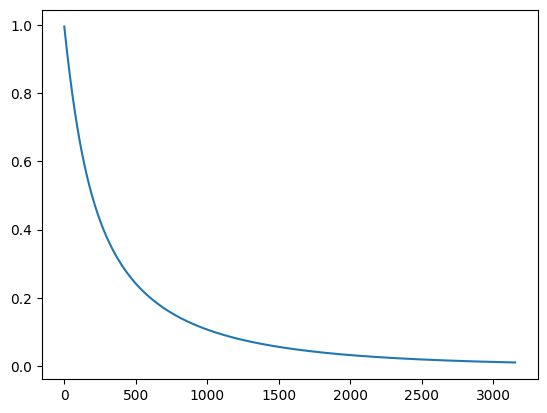

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(vals)

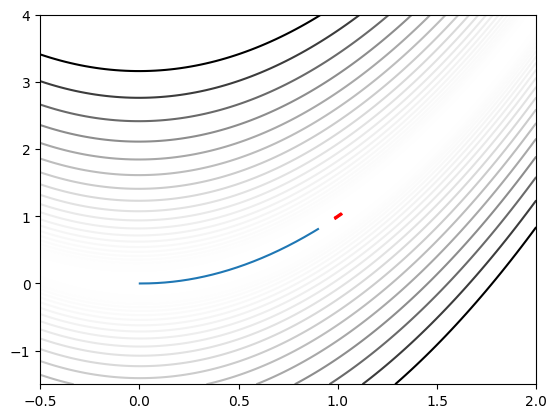

In [9]:
n = 100
m = 100
a = -0.5
b = 2
c = -1.5
d = 4

X,Y = np.meshgrid(np.linspace(a, b, n), np.linspace(c, d, m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X, Y, Z, np.logspace(-0.5, 3, 31), cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')

In [10]:
from scipy import optimize


optimize.minimize(lambda x: f(x[0], x[1]), x0=(0,0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439081505337648e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24

In [16]:
#Задание 4.7.1
from scipy import optimize

def f(x ,y):
    return 2*x**2 - 4*x*y + y**4 + 2


optimize.minimize(lambda x: f(x[0], x[1]), x0=(0,0))



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 2.980e-08  0.000e+00]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1

In [19]:
#Задание 4.7.3
from scipy import optimize

def f(x ,y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z


optimize.minimize(lambda x: f(x[0], x[1], x[2]), x0=(0,0,0))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -6.999999999999142
        x: [ 2.000e+00  1.000e+00 -2.000e+00]
      nit: 9
      jac: [ 3.517e-06 -7.153e-07  8.345e-07]
 hess_inv: [[ 1.695e-01  1.682e-01  2.115e-03]
            [ 1.682e-01  8.350e-01  3.349e-01]
            [ 2.115e-03  3.349e-01  6.685e-01]]
     nfev: 44
     njev: 11

In [21]:

print(int(-6.999999999999142), int(2.0))

-6 2


# 4.8. Градиентный спуск с momentum

Градиентный спуск с momentum
Заметим, что для ускорения спуска было бы неплохо учитывать изменения на прошлом шаге. В примере на рисунке мы видим, как алгоритм колеблется вокруг одной прямой. Было бы здорово явно сказать алгоритму держаться ближе к прямой и двигаться вдоль неё

x_new = (x_cur[0] - gamma * grad(*x_cur)[0] - alfa(x_cur - x ** n-1) , x_cur[1] - gamma * grad(*x_cur)[1] - alfa(x_cur - x ** n-1))

# 4.9. Метод Ньютона



# 4.10. Метод отжига